# XGBOOST MODEL


In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import shap
from sklearn.feature_selection import RFECV
import seaborn as sns

In [103]:
train_set = pd.read_csv('/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/datasets/bikingData/all_features_df_train.csv')
test_set = pd.read_csv('/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/datasets/bikingData/all_features_df_test.csv')


In [104]:
print(len(train_set))
print(len(test_set))

48746
13006


In [36]:
# Convert all columns to float where applicable
for col in train_set.columns:
    if col != 'Type':  # Skip 'Type' column for now
        train_set[col] = train_set[col].astype(float)

In [74]:
train_set.columns

Index(['Unnamed: 0', 'X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)', 'X (m/s^2).1',
       'Y (m/s^2).1', 'Z (m/s^2).1', 'X (rad/s)', 'Y (rad/s)', 'Z (rad/s)',
       'Latitude (°)', 'Longitude (°)', 'Height (m)', 'Velocity (m/s)',
       'Direction (°)', 'Horizontal Accuracy (m)', 'Vertical Accuracy (°)',
       'Type'],
      dtype='object')

ALL FEATURES:    'X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)', 'X (m/s^2).1',
       'Y (m/s^2).1', 'Z (m/s^2).1', 'X (rad/s)', 'Y (rad/s)', 'Z (rad/s)',
       'Latitude (°)', 'Longitude (°)', 'Height (m)', 'Velocity (m/s)',
       'Direction (°)', 'Horizontal Accuracy (m)', 'Vertical Accuracy (°)', 'X (m/s^2)_rolling_mean',
       'X (m/s^2)_rolling_std', 'Y (m/s^2)_rolling_mean',
       'Y (m/s^2)_rolling_std', 'Z (m/s^2)_rolling_mean',
       'Z (m/s^2)_rolling_std', 'X (m/s^2).1_rolling_mean',
       'X (m/s^2).1_rolling_std', 'Y (m/s^2).1_rolling_mean',
       'Y (m/s^2).1_rolling_std', 'Z (m/s^2).1_rolling_mean',
       'Z (m/s^2).1_rolling_std', 'X (rad/s)_rolling_mean',
       'X (rad/s)_rolling_std', 'Y (rad/s)_rolling_mean',
       'Y (rad/s)_rolling_std', 'Z (rad/s)_rolling_mean',
       'Z (rad/s)_rolling_std', 'Latitude (°)_rolling_mean',
       'Latitude (°)_rolling_std', 'Longitude (°)_rolling_mean',
       'Longitude (°)_rolling_std', 'Height (m)_rolling_mean',
       'Height (m)_rolling_std', 'Velocity (m/s)_rolling_mean',
       'Velocity (m/s)_rolling_std', 'Direction (°)_rolling_mean',
       'Direction (°)_rolling_std', 'Horizontal Accuracy (m)_rolling_mean',
       'Horizontal Accuracy (m)_rolling_std',
       'Vertical Accuracy (°)_rolling_mean',
       'Vertical Accuracy (°)_rolling_std', 'X (m/s^2)_highest_freq',
       'X (m/s^2)_weighted_avg_freq', 'X (m/s^2)_power_spectral_entropy',
       'Y (m/s^2)_highest_freq', 'Y (m/s^2)_weighted_avg_freq',
       'Y (m/s^2)_power_spectral_entropy', 'Z (m/s^2)_highest_freq',
       'Z (m/s^2)_weighted_avg_freq', 'Z (m/s^2)_power_spectral_entropy',
       'X (m/s^2).1_highest_freq', 'X (m/s^2).1_weighted_avg_freq',
       'X (m/s^2).1_power_spectral_entropy', 'Y (m/s^2).1_highest_freq',
       'Y (m/s^2).1_weighted_avg_freq', 'Y (m/s^2).1_power_spectral_entropy',
       'Z (m/s^2).1_highest_freq', 'Z (m/s^2).1_weighted_avg_freq',
       'Z (m/s^2).1_power_spectral_entropy', 'X (rad/s)_highest_freq',
       'X (rad/s)_weighted_avg_freq', 'X (rad/s)_power_spectral_entropy',
       'Y (rad/s)_highest_freq', 'Y (rad/s)_weighted_avg_freq',
       'Y (rad/s)_power_spectral_entropy', 'Z (rad/s)_highest_freq',
       'Z (rad/s)_weighted_avg_freq', 'Z (rad/s)_power_spectral_entropy',
       'Latitude (°)_highest_freq', 'Latitude (°)_weighted_avg_freq',
       'Latitude (°)_power_spectral_entropy', 'Longitude (°)_highest_freq',
       'Longitude (°)_weighted_avg_freq',
       'Longitude (°)_power_spectral_entropy', 'Height (m)_highest_freq',
       'Height (m)_weighted_avg_freq', 'Height (m)_power_spectral_entropy',
       'Velocity (m/s)_highest_freq', 'Velocity (m/s)_weighted_avg_freq',
       'Velocity (m/s)_power_spectral_entropy', 'Direction (°)_highest_freq',
       'Direction (°)_weighted_avg_freq',
       'Direction (°)_power_spectral_entropy',
       'Horizontal Accuracy (m)_highest_freq',
       'Horizontal Accuracy (m)_weighted_avg_freq',
       'Horizontal Accuracy (m)_power_spectral_entropy',
       'Vertical Accuracy (°)_highest_freq',
       'Vertical Accuracy (°)_weighted_avg_freq',
       'Vertical Accuracy (°)_power_spectral_entropy'

In [105]:
# Select features and target
features = ['filtered X (m/s^2).1', 'filtered Velocity (m/s)',
       'X (m/s^2)_rolling_mean', 'X (m/s^2)_rolling_std',
       'Y (m/s^2)_rolling_mean', 'Y (m/s^2)_rolling_std',
       'Z (m/s^2)_rolling_mean', 'X (m/s^2).1_rolling_mean',
       'X (m/s^2).1_rolling_std', 'Y (m/s^2).1_rolling_mean',
       'Y (m/s^2).1_rolling_std', 'Z (m/s^2).1_rolling_mean',
       'Z (m/s^2).1_rolling_std', 'X (rad/s)_rolling_mean',
       'X (rad/s)_rolling_std', 'Y (rad/s)_rolling_mean',
       'Z (rad/s)_rolling_mean', 'Z (rad/s)_rolling_std',
       'filtered X (m/s^2)_rolling_mean', 'filtered X (m/s^2)_rolling_std',
       'filtered Y (m/s^2)_rolling_mean', 'filtered Y (m/s^2)_rolling_std',
       'filtered Z (m/s^2)_rolling_mean', 'filtered X (m/s^2).1_rolling_mean',
       'filtered X (m/s^2).1_rolling_std', 'filtered Y (m/s^2).1_rolling_mean',
       'filtered Y (m/s^2).1_rolling_std', 'filtered Z (m/s^2).1_rolling_mean',
       'filtered Z (m/s^2).1_rolling_std', 'filtered X (rad/s)_rolling_std',
       'filtered Y (rad/s)_rolling_mean', 'filtered Y (rad/s)_rolling_std',
       'filtered Z (rad/s)_rolling_mean', 'filtered Z (rad/s)_rolling_std',
       'filtered Velocity (m/s)_rolling_mean',
       'filtered Velocity (m/s)_rolling_std',
       'Absolute Acceleration_rolling_mean',
       'Absolute Acceleration_rolling_std',
       'Absolute linear Acceleration_rolling_mean',
       'Absolute linear Acceleration_rolling_std',
       'Absolute Radius_rolling_mean', 'Absolute Radius_rolling_std',
       'X (m/s^2)_power_spectral_entropy', 'Y (m/s^2)_weighted_avg_freq',
       'Y (m/s^2)_power_spectral_entropy', 'Z (m/s^2)_power_spectral_entropy',
       'X (m/s^2).1_highest_freq', 'X (m/s^2).1_power_spectral_entropy',
       'Y (m/s^2).1_weighted_avg_freq', 'Y (m/s^2).1_power_spectral_entropy',
       'Z (m/s^2).1_highest_freq', 'X (rad/s)_highest_freq',
       'Z (rad/s)_highest_freq', 'Z (rad/s)_power_spectral_entropy',
       'filtered X (m/s^2)_power_spectral_entropy',
       'filtered Y (m/s^2)_power_spectral_entropy',
       'filtered Z (m/s^2)_power_spectral_entropy',
       'filtered Z (m/s^2).1_highest_freq', 'filtered Y (rad/s)_highest_freq',
       'filtered Z (rad/s)_highest_freq',
       'filtered Z (rad/s)_power_spectral_entropy',
       'filtered Velocity (m/s)_weighted_avg_freq',
       'filtered Velocity (m/s)_power_spectral_entropy',
       'Absolute Acceleration_power_spectral_entropy',
       'Absolute linear Acceleration_power_spectral_entropy',
       'Absolute Radius_power_spectral_entropy']  


X_train = train_set.drop(columns=['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0' ,'Type'], axis=1) #'Unnamed: 0.2', 'Unnamed: 0.1'

y_train = train_set['Type']  # target variable

X_test = test_set.drop(columns=['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0' ,'Type'], axis=1) #'Unnamed: 0.2', 'Unnamed: 0.1'



In [106]:
# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


In [107]:
dtrain = xgb.DMatrix(X_train, label=y_train_encoded)
dtest = xgb.DMatrix(X_test)

In [108]:
# Define parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # for classification
    'num_class': len(label_encoder.classes_),  # number of classes
    'eval_metric': 'merror', #mlogloss
    'learning_rate': 0.5,
    'max_depth': 3,
    'eta': 0.001,
}

In [109]:
bst = xgb.train(params, dtrain, num_boost_round=2000)

In [113]:
# Predict on the test set
preds = bst.predict(dtest)
preds_labels = label_encoder.inverse_transform(preds.astype(int))


In [68]:
# Print predictions
print(preds_labels)

['O' 'O' 'O' ... 'S' 'S' 'S']


In [114]:
y_test = test_set['Type']

# Encode the test labels
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Predict on the test set
preds = bst.predict(dtest)
preds_labels = label_encoder.inverse_transform(preds.astype(int))

In [117]:
class_names = ['RT', 'L', 'F', 'L', 'O']

In [124]:
# Predict on the test set
preds = bst.predict(dtest)
preds_labels = label_encoder.inverse_transform(preds.astype(int))

# Count predicted labels
unique, counts = np.unique(preds_labels, return_counts=True)
pred_counts = dict(zip(unique, counts))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, preds)

# Extract correctly predicted instances
correct_predictions = np.diagonal(conf_matrix)

# Create a dictionary to map class names to their correct predictions count
correct_predictions_dict = dict(zip(label_encoder.classes_, correct_predictions))

# Calculate relative percentage of correct predictions
relative_correct_percentage = {label: (correct_predictions_dict.get(label, 0) / pred_counts.get(label, 1) * 100) 
                               for label in label_encoder.classes_}

/var/folders/y2/4b7d_vjj5d70m77w1bxwqw640000gn/T/ipykernel_31291/182077510.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(relative_correct_percentage.keys()), y=list(relative_correct_percentage.values()), palette='tab10')


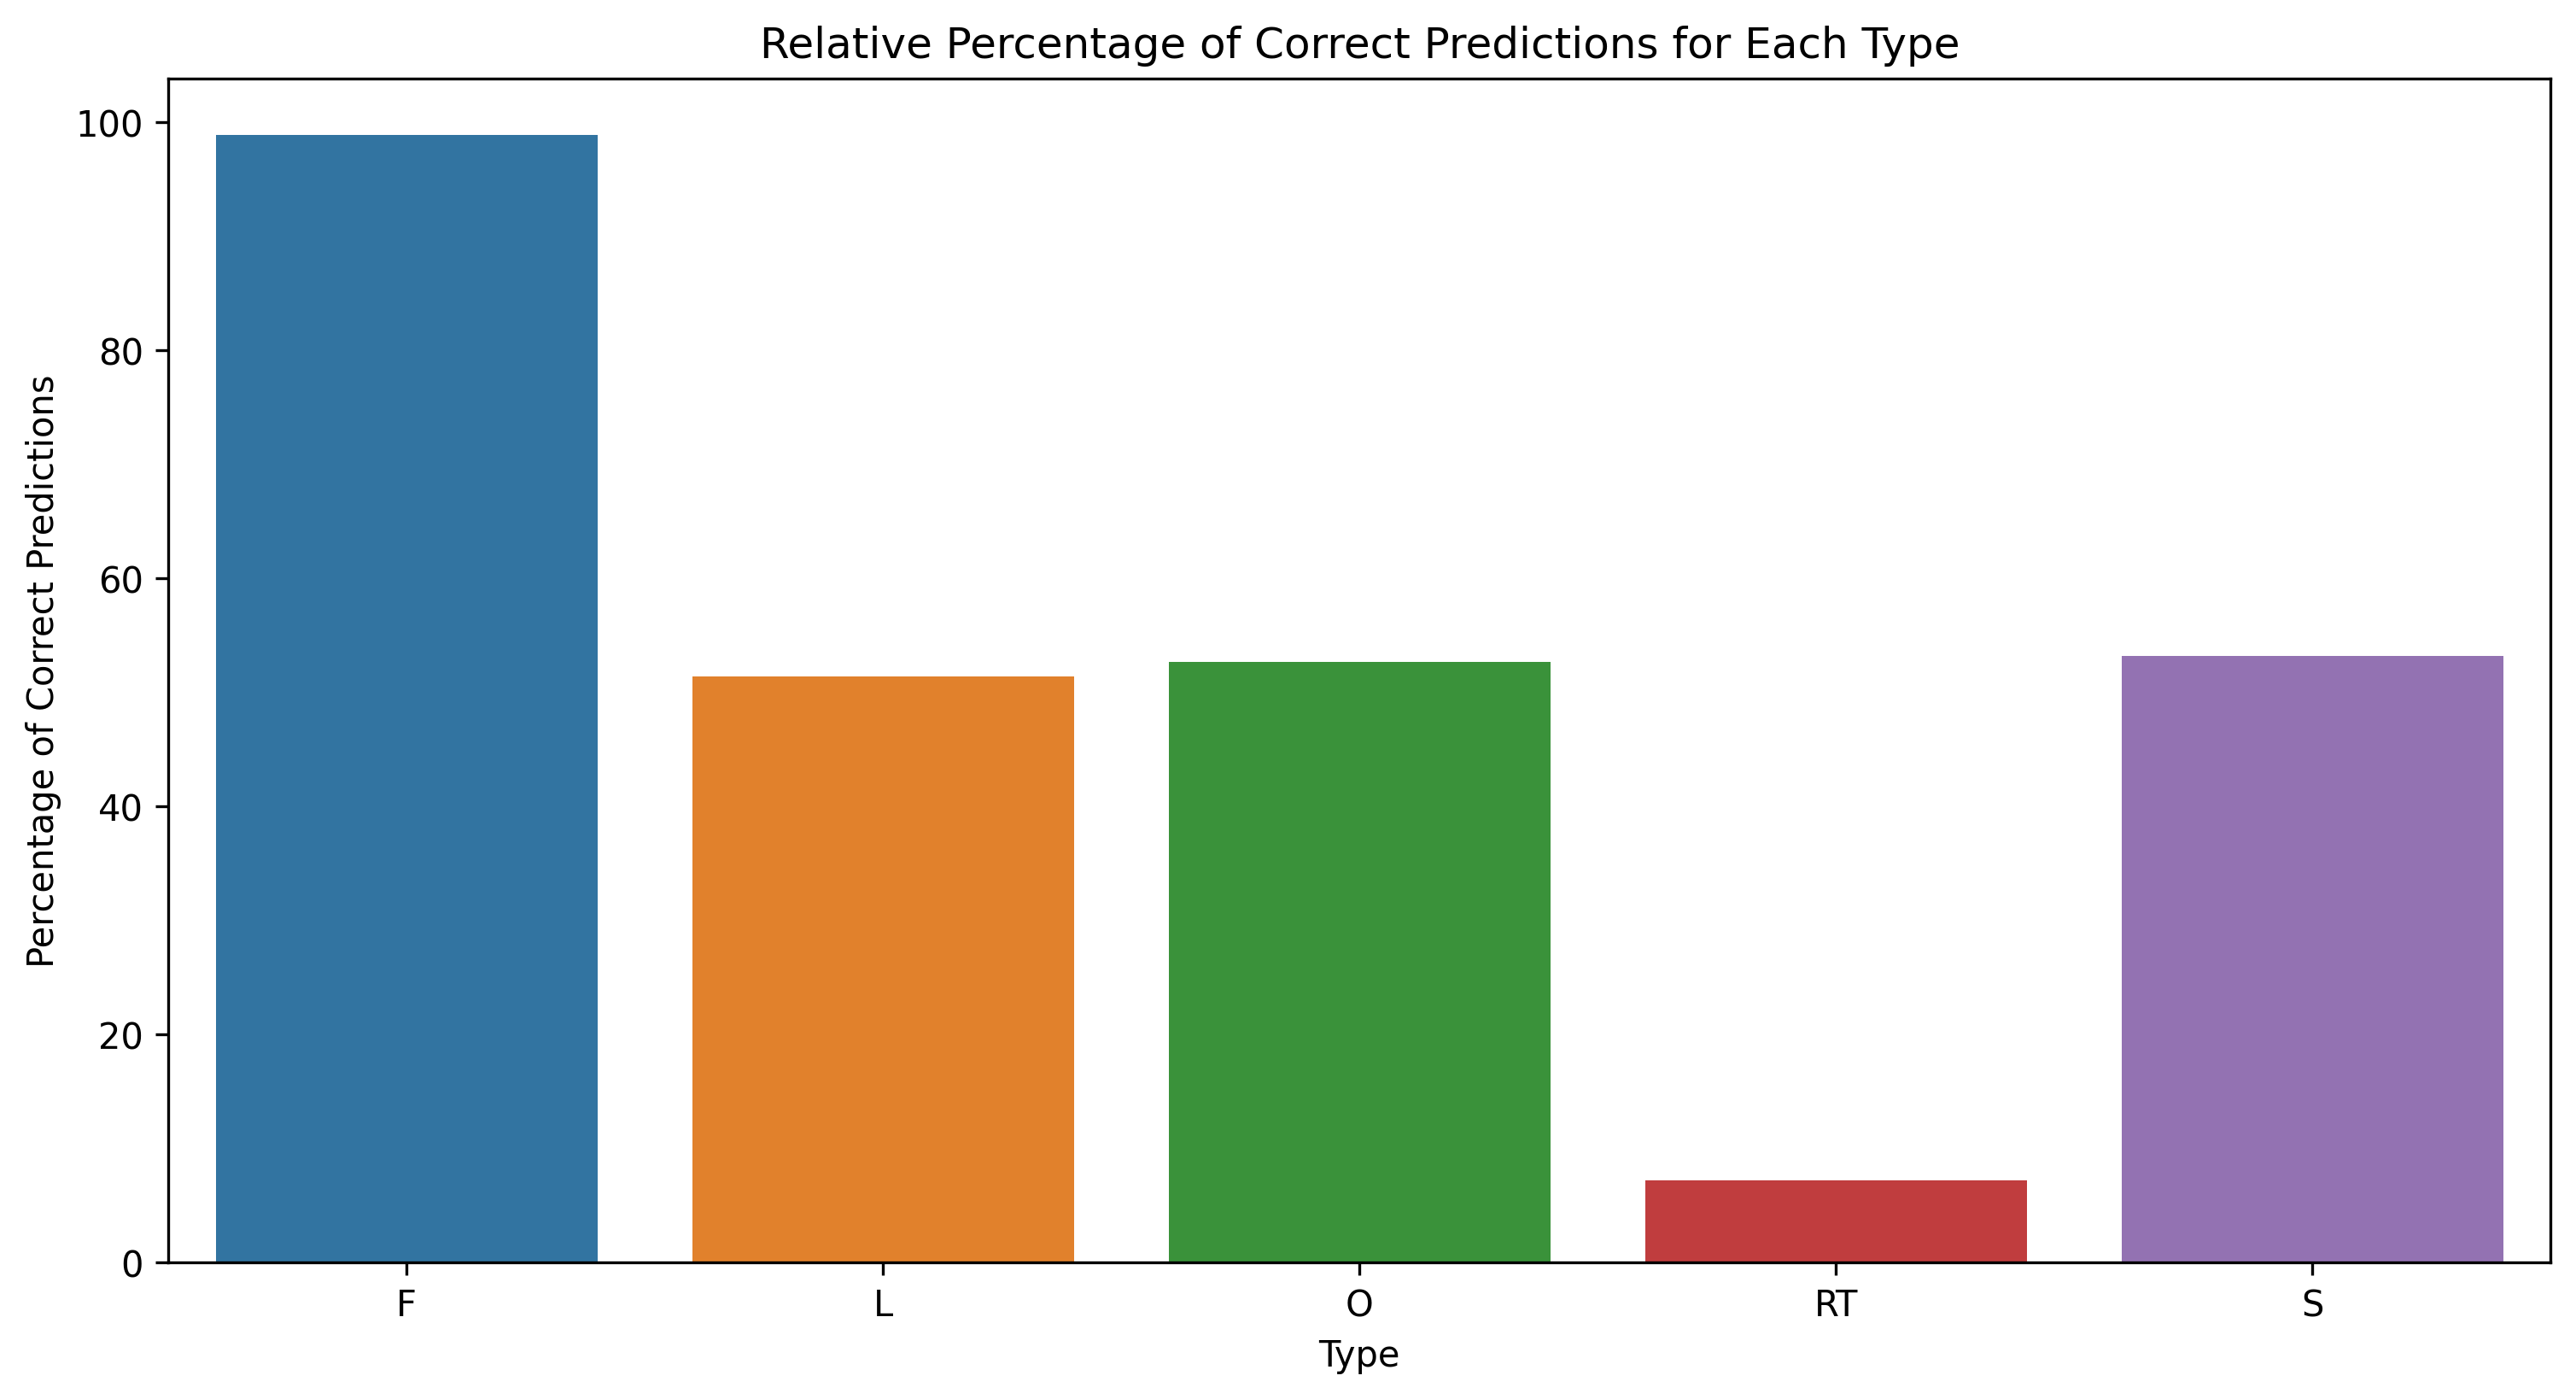

In [125]:
# Plot relative percentage of correct predictions
plt.figure(figsize=(12, 6), dpi=300)
sns.barplot(x=list(relative_correct_percentage.keys()), y=list(relative_correct_percentage.values()), palette='tab10')
plt.xlabel('Type')
plt.ylabel('Percentage of Correct Predictions')
plt.title('Relative Percentage of Correct Predictions for Each Type')
plt.show()

In [121]:
# Align the dictionaries for plotting
all_labels = sorted(set(pred_counts.keys()).union(correct_predictions_dict.keys()))
pred_counts_aligned = [pred_counts.get(label, 0) for label in all_labels]
correct_predictions_aligned = [correct_predictions_dict.get(label, 0) for label in all_labels]

# Plot
x = np.arange(len(all_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

bars1 = ax.bar(x - width/2, pred_counts_aligned, width, label='Predicted', color='blue')
bars2 = ax.bar(x + width/2, correct_predictions_aligned, width, label='Correct', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Type')
ax.set_ylabel('Count')
ax.set_title('Counts of Predicted and Correct Labels')
ax.set_xticks(x)
ax.set_xticklabels(all_labels)
ax.legend()

# Add count labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()

AttributeError: 'tuple' object has no attribute 'keys'

In [82]:
preds_labels = label_encoder.inverse_transform(preds.astype(int))

# Calculate metrics
accuracy = accuracy_score(y_test_encoded, preds)
precision = precision_score(y_test_encoded, preds, average='weighted')
recall = recall_score(y_test_encoded, preds, average='weighted')
f1 = f1_score(y_test_encoded, preds, average='weighted')
conf_matrix = confusion_matrix(y_test_encoded, preds)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

# Alternatively, print a comparison of actual vs predicted labels
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': preds_labels})
print(comparison)

Accuracy: 27.14%
Precision: 0.59
Recall: 0.27
F1 Score: 0.34
Confusion Matrix:
[[1330  169  165  450  582]
 [ 155 1051  948 3221  467]
 [  60  262  636  858 1103]
 [   7   84  185  351  325]
 [   0    0    0    0    0]]
      Actual Predicted
0          L         L
1          L        RT
2          L         S
3          L        RT
4          L         S
...      ...       ...
12404      L        RT
12405      L         S
12406      L         S
12407      L         S
12408      L        RT

[12409 rows x 2 columns]


/Users/carokluin/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [83]:
# Initialize SHAP TreeExplainer
explainer = shap.TreeExplainer(bst)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

In [84]:
class_names = label_encoder.classes_
print(class_names)

# Get the feature names
feature_names = X_test.columns.tolist()

['F' 'L' 'O' 'RT' 'S']


In [18]:
# Inspect the shapes of SHAP values and features
print("SHAP values shape:", shap_values.shape)
print("X_test shape:", X_test.shape)

# Inspect the first few rows of SHAP values and X_test to check for discrepancies
print("First few rows of SHAP values:", shap_values[:5])
print("First few rows of X_test:", X_test.head())

# Verify the number of features and SHAP values match
assert shap_values.shape[1] == X_test.shape[1], "Mismatch between SHAP values and features"

SHAP values shape: (12409, 16, 5)
X_test shape: (12409, 16)
First few rows of SHAP values: [[[-4.33972597e-01  1.20364003e-01 -3.15209508e-01  3.21849845e-02
    1.82562307e-01]
  [-1.52981913e+00  6.22915268e-01  1.63298935e-01  1.51200145e-01
    6.10413030e-02]
  [ 5.08156456e-02 -3.83831374e-02  5.81310540e-02 -5.65316007e-02
    8.74132477e-03]
  [ 7.44876862e-02  3.84409241e-02 -2.10974768e-01 -1.92558601e-01
    7.16072991e-02]
  [ 1.84662715e-01 -1.09621376e-01 -7.82141984e-02  1.98866501e-01
   -7.38524124e-02]
  [ 7.10195079e-02 -2.67700497e-02  1.81147493e-02 -2.21958868e-02
   -3.06455838e-03]
  [ 5.93234152e-02  1.83503348e-02  1.97718143e-02 -5.98829836e-02
   -2.83038504e-02]
  [-5.16558904e-03  3.64257768e-02 -1.23259742e-02 -6.27441406e-02
    7.60788517e-03]
  [ 4.80954386e-02 -5.56142116e-03  1.14166941e-02 -1.40768990e-01
    2.77134124e-02]
  [-1.78381270e-05  6.41445979e-04  1.52000121e-03  1.82534964e-03
   -1.26996194e-04]
  [-2.41032382e-03  3.30082810e-04 -8.9

In [90]:
# Plot SHAP summary for FALLING
plt.figure(figsize=(10, 6), dpi=300)
plt.title("SHAP Summary for Falling")
shap.summary_plot(shap_values[:, :,0], X_test, feature_names=feature_names, show=False)
output_path ='/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/figures/SHAP_fal.png'
plt.savefig(output_path)
plt.close()

In [87]:
# Plot SHAP summary LEFT TURN 
plt.figure(figsize=(10, 6), dpi=300)
plt.title("SHAP Summary for Left Turn")
shap.summary_plot(shap_values[:, :,1], X_test, feature_names=feature_names, show=False)
output_path ='/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/figures/SHAP_LT.png'
plt.savefig(output_path)
plt.close()

In [88]:

# Plot SHAP summary for OVERTAKE
plt.figure(figsize=(10, 6), dpi=300)
plt.title("SHAP Summary for Overtake")
shap.summary_plot(shap_values[:, :,2], X_test, feature_names=feature_names, show=False)
output_path ='/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/figures/SHAP_O.png'
plt.savefig(output_path)
plt.close()

In [89]:
# Plot SHAP summary for RIGHT TURN
plt.figure(figsize=(10, 6), dpi=300)
plt.title("SHAP Summary for Right Turn")
shap.summary_plot(shap_values[:, :,3], X_test, feature_names=feature_names, show=False)
output_path ='/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/figures/SHAP_RT.png'
plt.savefig(output_path)
plt.close()

In [91]:
# Plot SHAP summary for STRAIGHT
plt.figure(figsize=(10, 6), dpi=300)
plt.title("SHAP Summary for Straight")
shap.summary_plot(shap_values[:, :,4], X_test, feature_names=feature_names, show=False)
output_path ='/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/figures/SHAP_S.png'
plt.savefig(output_path)
plt.close()

In [95]:
# Perform cross-validation and record evaluation results
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=2000,
    nfold=5,
    early_stopping_rounds=50,
    metrics='merror',
    seed=42,
    shuffle=True
)

# Plot learning curves
epochs = len(cv_results)
x_axis = range(0, epochs)


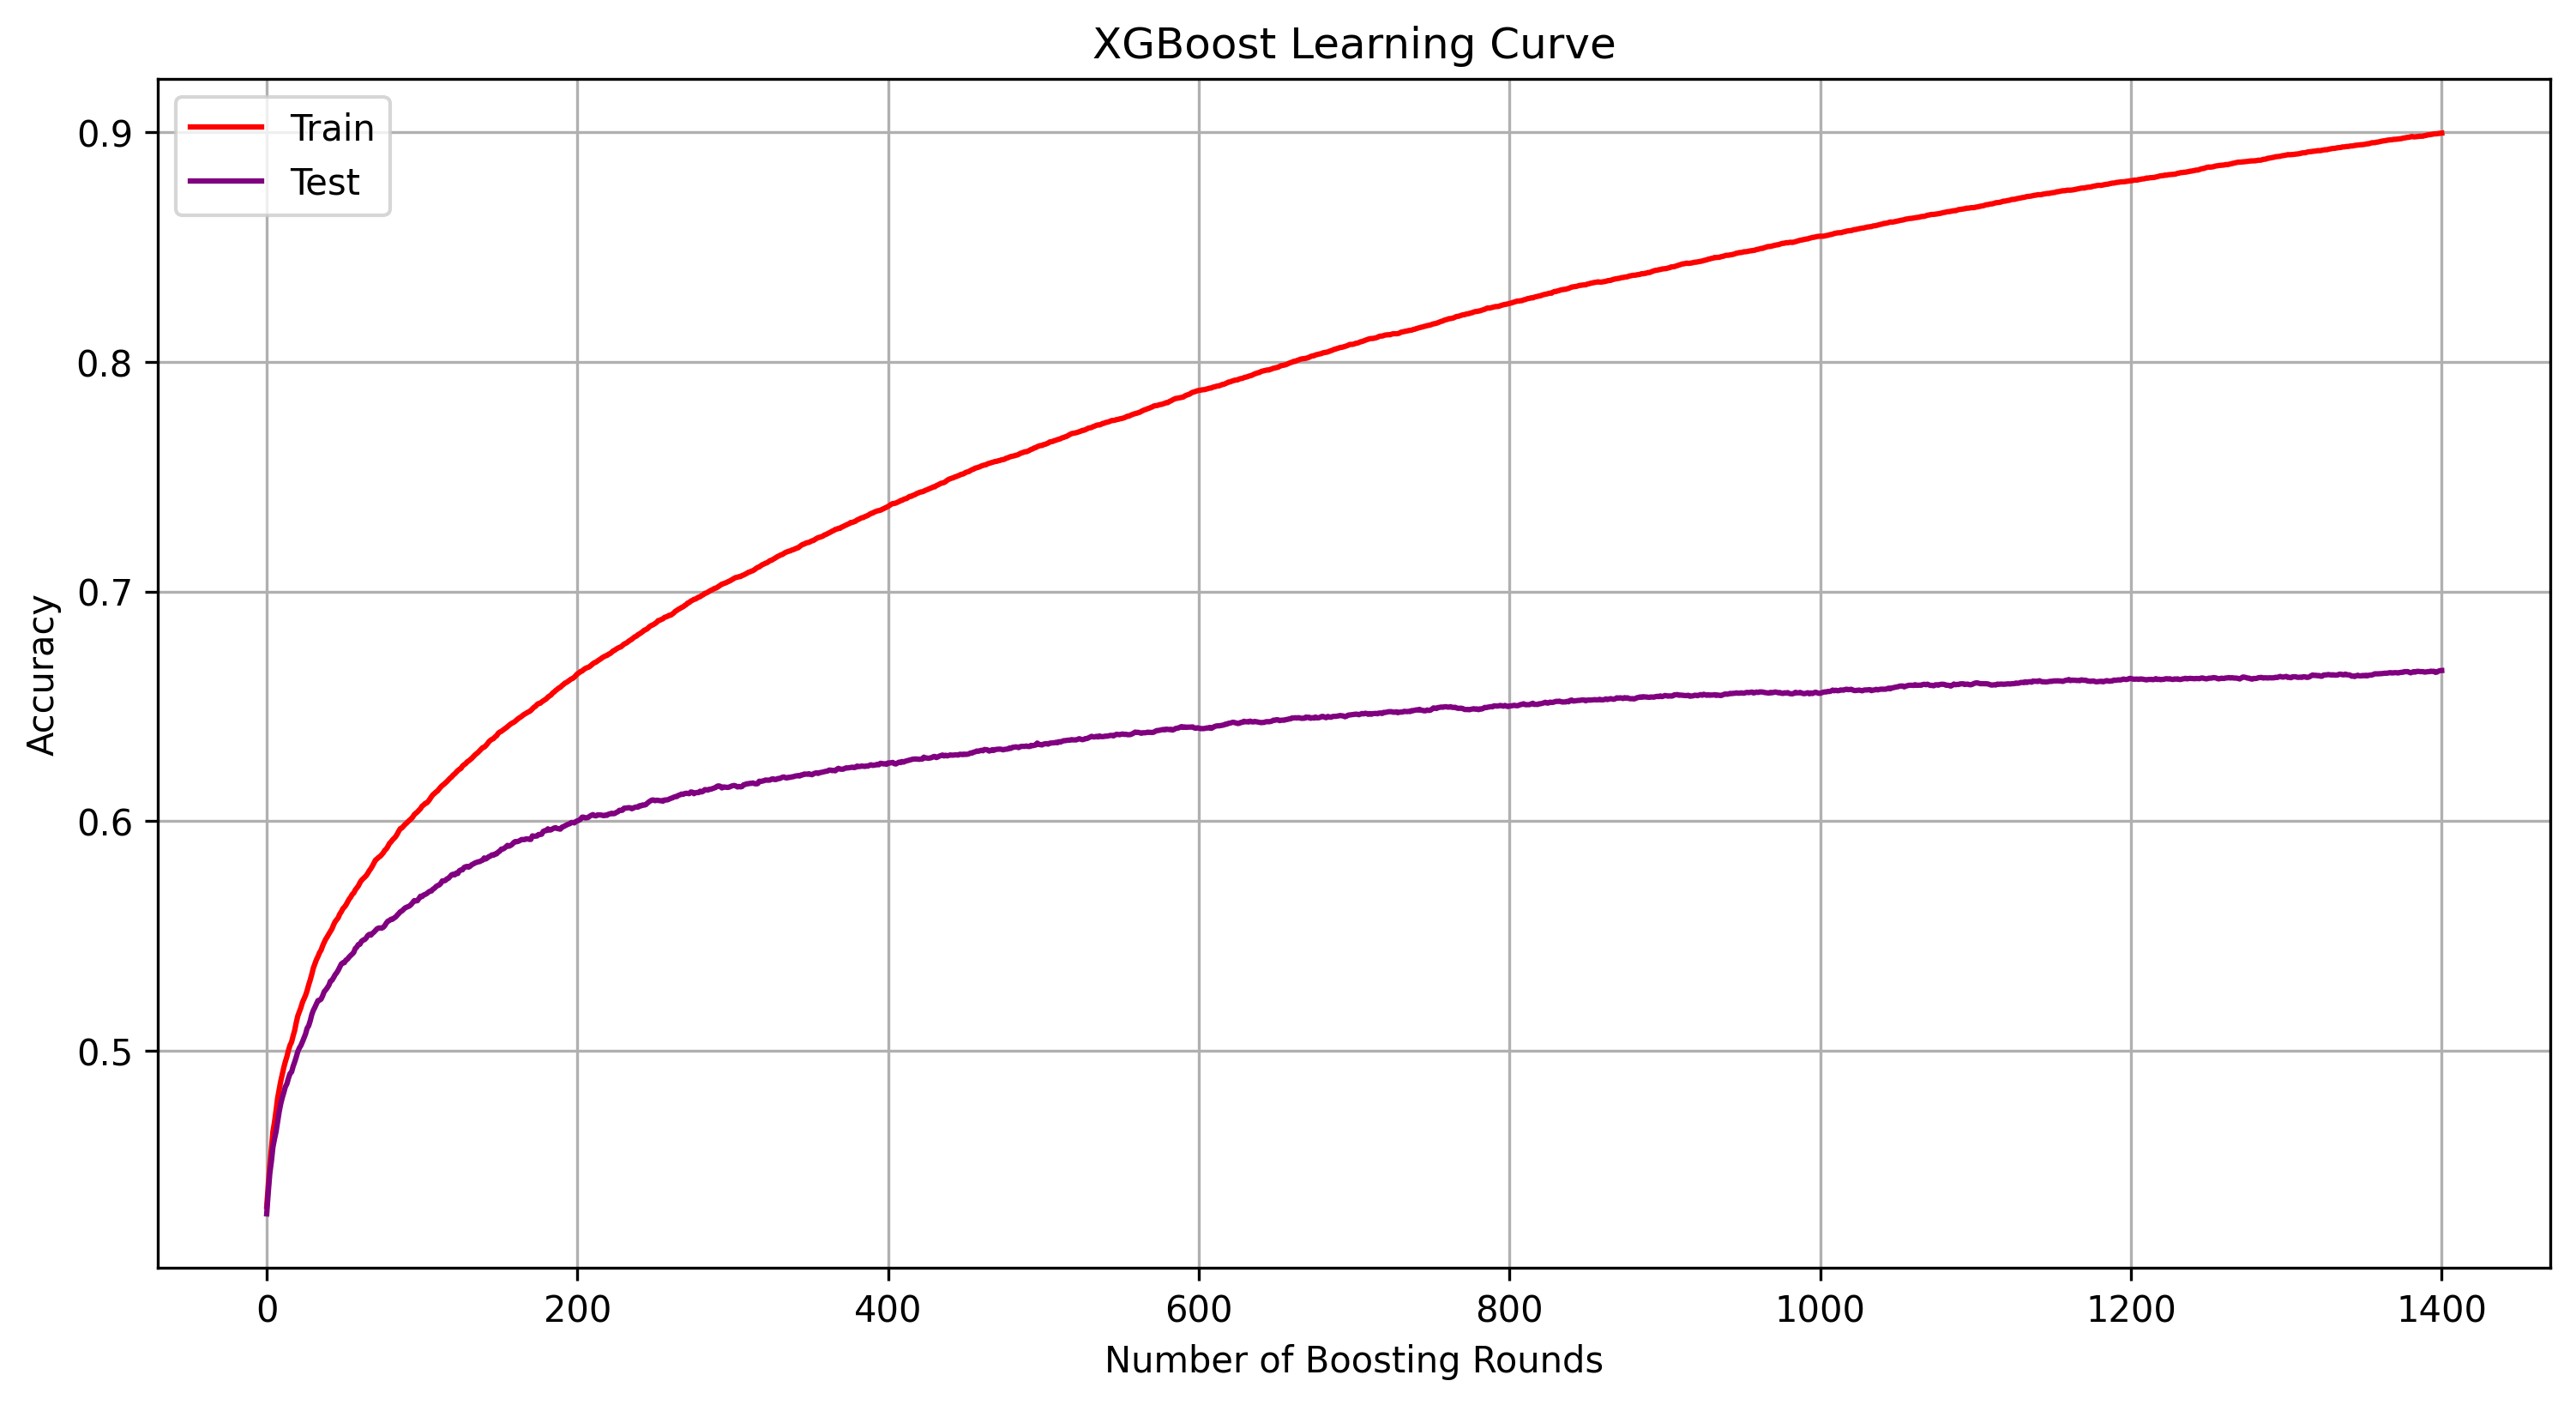

In [97]:
 # Convert error to accuracy
cv_results['train-accuracy-mean'] = 1 - cv_results['train-merror-mean']
cv_results['test-accuracy-mean'] = 1 - cv_results['test-merror-mean']
    
plt.figure(figsize=(12, 6), dpi=300)
plt.plot(x_axis, cv_results['train-accuracy-mean'], label='Train', color='red')
plt.plot(x_axis, cv_results['test-accuracy-mean'], label='Test', color='purple')
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('Accuracy')
plt.title('XGBoost Learning Curve')
plt.legend()
plt.grid(True)
output_path = '/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/figures/learningcurve.png'
plt.savefig(output_path)
plt.show()

## GRID SEARCH

In [22]:
def perform_grid_search(X_train, y_train, label_encoder):
    # Define initial parameters
    params = {
        'objective': 'multi:softmax',
        'num_class': len(label_encoder.classes_),
        'eval_metric': 'mlogloss',
        'seed': 42
    }

    # Define the parameter grid
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.5, 0.8],
        'max_depth': [3,4, 5, 6],
        'eta': [0.001, 0.005, 0.01]
    }

    # Initialize the XGBoost classifier
    xgb_model = xgb.XGBClassifier(**params)

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Get the best parameters and the best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    return best_params, best_score

# Example usage:
# best_params, best_score = perform_grid_search(X_train, y_train, label_encoder)
# print(f"Best parameters found: {best_params}")
# print(f"Best cross-validation accuracy: {best_score}")


In [23]:
best_params, best_score = perform_grid_search(X_train, y_train_encoded, label_encoder)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [58]:
print(best_params)

{'eta': 0.001, 'learning_rate': 0.5, 'max_depth': 3}


# Feature selection

## XGBOOST classifier

In [9]:
# Continue with model definition

model = xgb.dask.XGBClassifier(**params)
    #objective='binary:logistic', random_state=42)

model.fit(X_train, y_train_encoded)

# Assuming feature_importance is a dictionary obtained from XGBoost
feature_importance_dict = model.get_booster().get_score(importance_type='weight')

# Convert to a pandas Series
importance_series = pd.Series(feature_importance_dict)

# If you want to use Dask for some reason, you can convert this Series back to a Dask Series
#importance_series_dd = dd.from_pandas(importance_series, npartitions=1)

# Sort the features by importance using pandas
sorted_importance = importance_series.sort_values(ascending=False)

In [126]:
print(sorted_importance)

filtered Velocity (m/s)                 653.0
filtered Velocity (m/s)_rolling_mean    434.0
Y (m/s^2)_rolling_mean                  382.0
filtered Velocity (m/s)_rolling_std     343.0
X (m/s^2)_rolling_mean                  208.0
                                        ...  
filtered Z (m/s^2)_highest_freq           1.0
filtered Y (m/s^2)_highest_freq           1.0
filtered X (m/s^2)_weighted_avg_freq      1.0
X (m/s^2)_highest_freq                    1.0
filtered Z (m/s^2).1                      1.0
Length: 117, dtype: float64


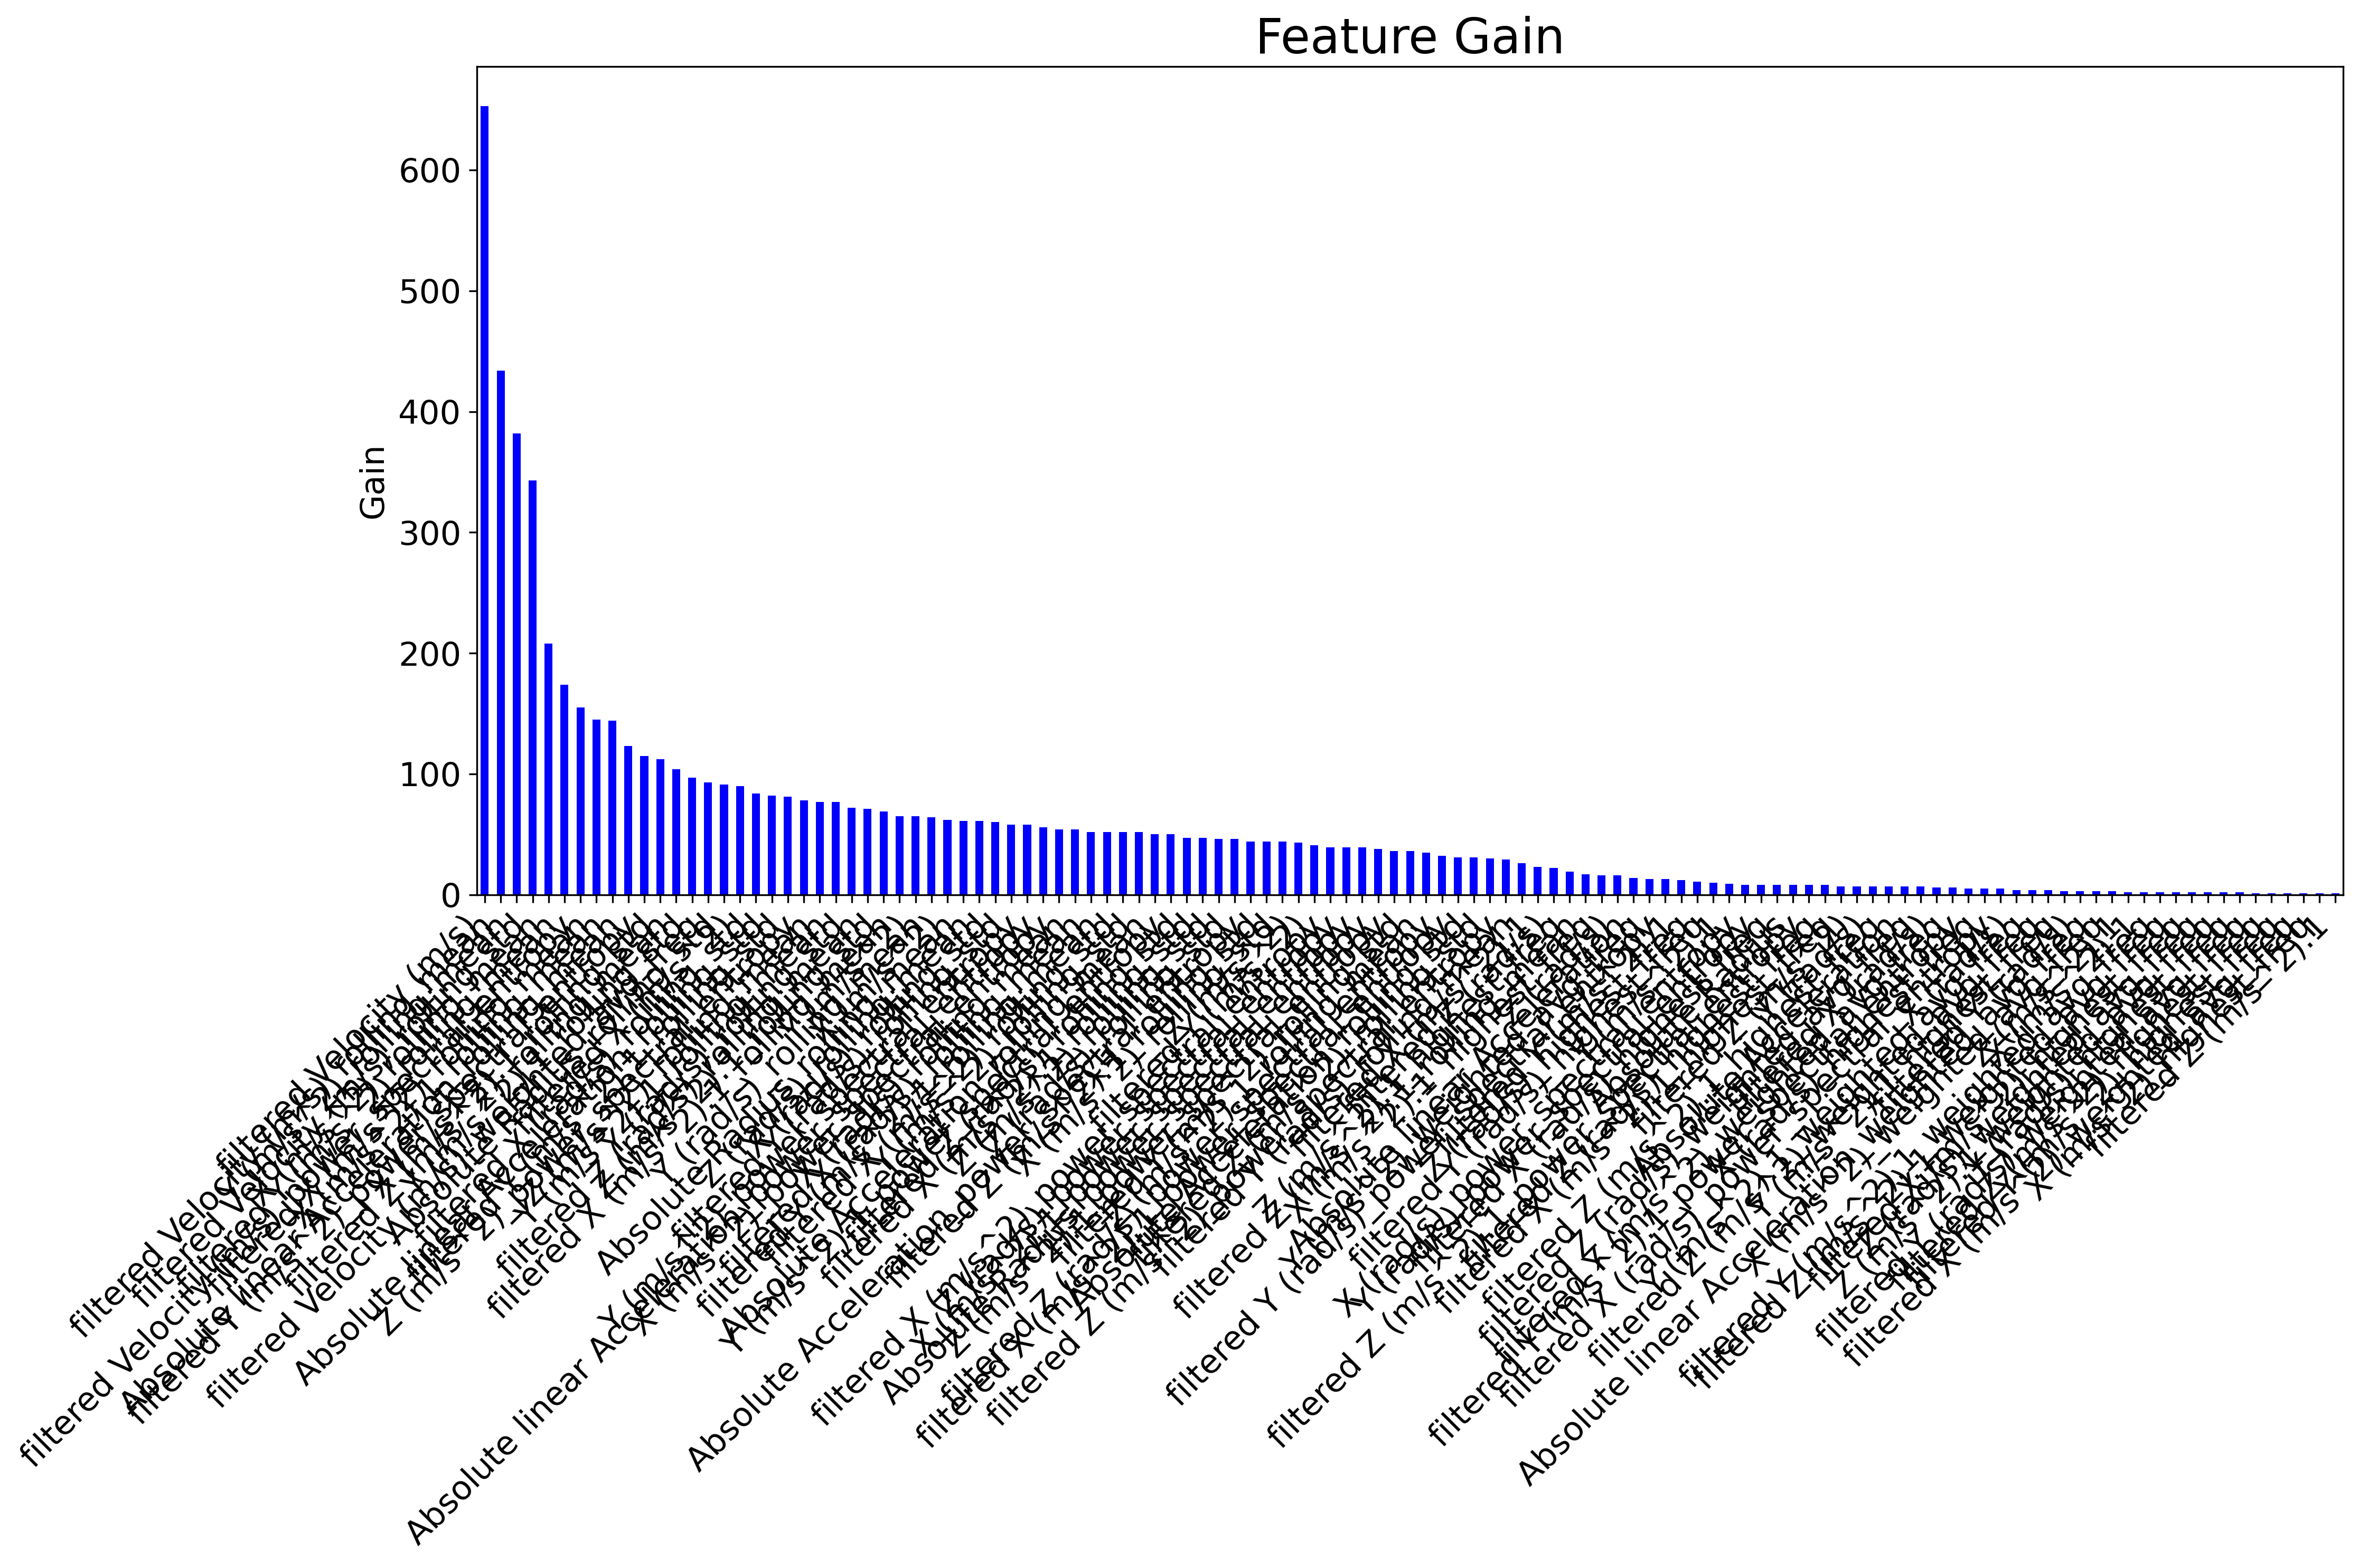

In [127]:
# Get feature names from the Dask DataFrame
feature_names = X_train.columns

# Create a mapping from XGBoost's feature names ('f0', 'f1', ...) to actual feature names
index_mapping = {f'f{i}': name for i, name in enumerate(feature_names)}

# Map feature importance keys to actual feature names
mapped_importances = {index_mapping[k]: v for k, v in feature_importance_dict.items() if k in index_mapping}

# Convert to a pandas Series
importance_series = pd.Series(mapped_importances)

# Sort the series
#sorted_importance = importance_series.sort_values(ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(15, 10),dpi=300) 
sorted_importance.plot(kind='bar', color='blue', ax=ax)
ax.set_title('Feature Gain', size=22)
ax.set_ylabel('Gain', size=15)
#ax.set_xlabel('Features', size=15)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
#plt.savefig('feature_gainxgb.png')
plt.show()

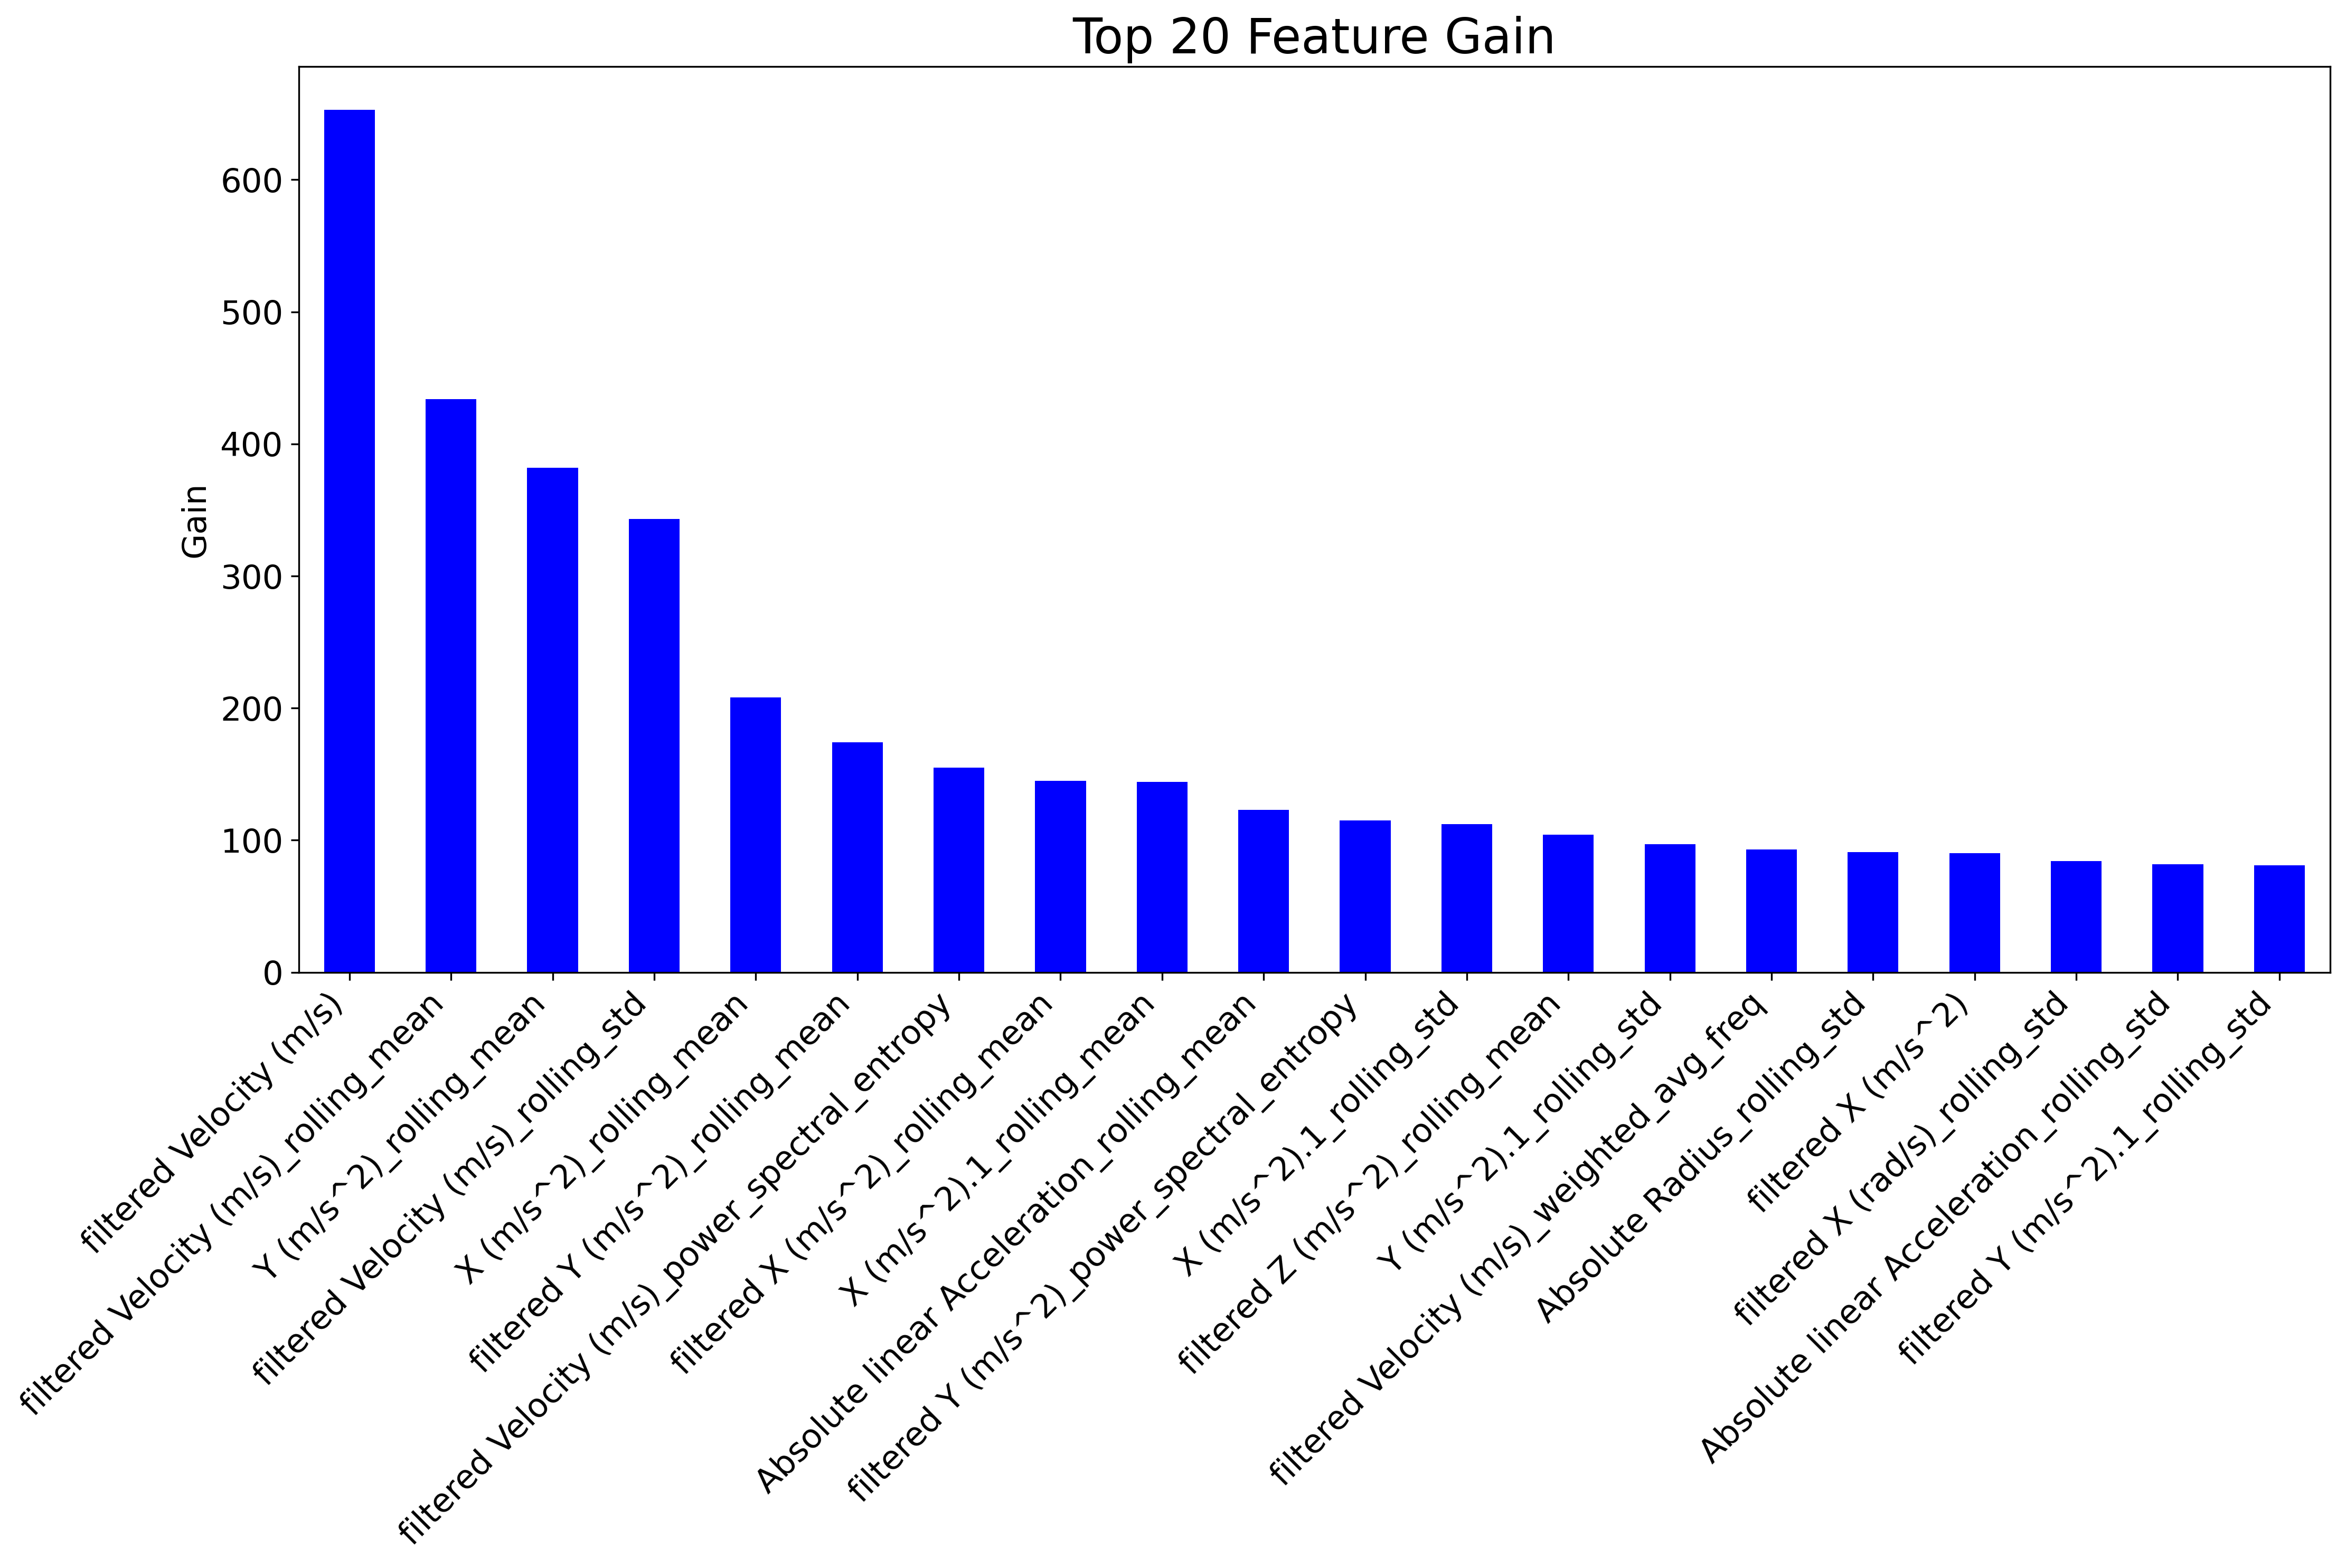

In [92]:
# Sort the series and get the top 50 features
top_50_importance = sorted_importance.sort_values(ascending=False).head(20)

# Plotting
fig, ax = plt.subplots(figsize=(15, 10), dpi=300)
top_50_importance.plot(kind='bar', color='blue', ax=ax)
ax.set_title('Top 20 Feature Gain', size=22)
ax.set_ylabel('Gain', size=15)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
output_path = '/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/figures/featuregain.png'
plt.savefig(output_path)
plt.show()

Optimal number of features: 66
Selected features: Index(['filtered X (m/s^2).1', 'filtered Velocity (m/s)',
       'X (m/s^2)_rolling_mean', 'X (m/s^2)_rolling_std',
       'Y (m/s^2)_rolling_mean', 'Y (m/s^2)_rolling_std',
       'Z (m/s^2)_rolling_mean', 'X (m/s^2).1_rolling_mean',
       'X (m/s^2).1_rolling_std', 'Y (m/s^2).1_rolling_mean',
       'Y (m/s^2).1_rolling_std', 'Z (m/s^2).1_rolling_mean',
       'Z (m/s^2).1_rolling_std', 'X (rad/s)_rolling_mean',
       'X (rad/s)_rolling_std', 'Y (rad/s)_rolling_mean',
       'Z (rad/s)_rolling_mean', 'Z (rad/s)_rolling_std',
       'filtered X (m/s^2)_rolling_mean', 'filtered X (m/s^2)_rolling_std',
       'filtered Y (m/s^2)_rolling_mean', 'filtered Y (m/s^2)_rolling_std',
       'filtered Z (m/s^2)_rolling_mean', 'filtered X (m/s^2).1_rolling_mean',
       'filtered X (m/s^2).1_rolling_std', 'filtered Y (m/s^2).1_rolling_mean',
       'filtered Y (m/s^2).1_rolling_std', 'filtered Z (m/s^2).1_rolling_mean',
       'filtered Z (m/s^

AttributeError: 'RFECV' object has no attribute 'grid_scores_'

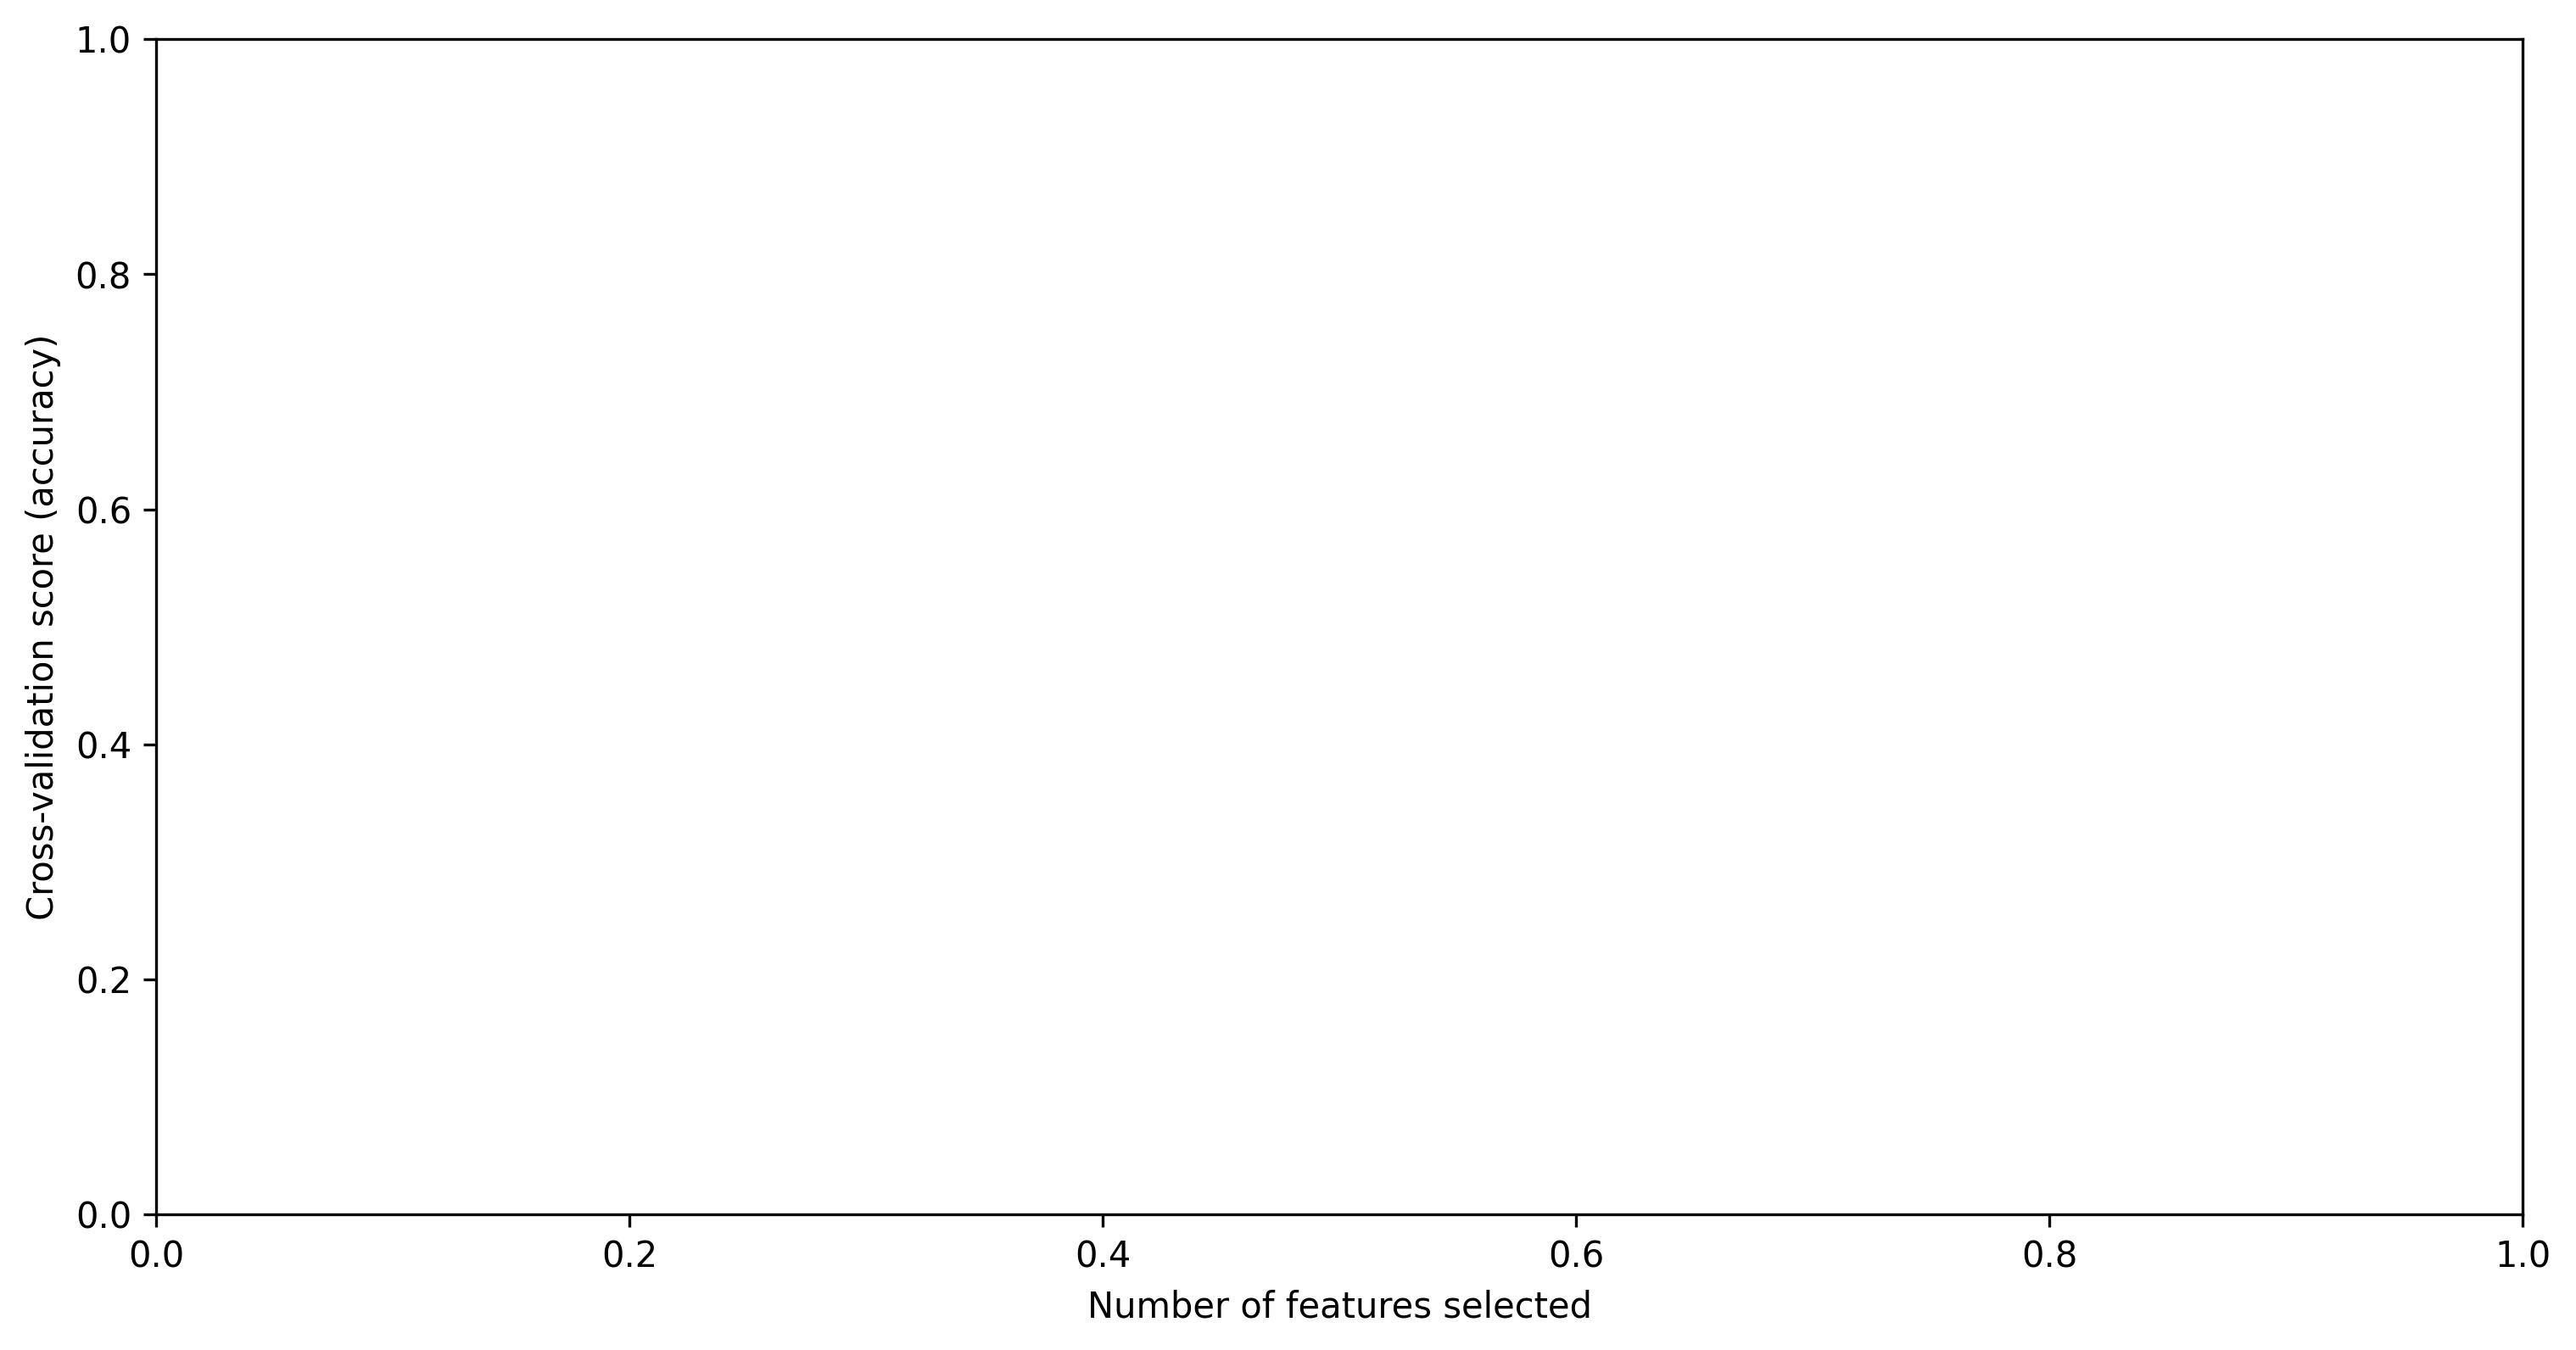

In [10]:
# Perform Recursive Feature Elimination with Cross-Validation (RFECV)
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train_encoded)

# Print the optimal number of features
print("Optimal number of features: %d" % rfecv.n_features_)

# Print the selected features
selected_features = X_train.columns[rfecv.support_]
print("Selected features: %s" % selected_features)

# Plot the number of features vs. cross-validation scores
plt.figure(figsize=(12, 6), dpi=300)
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='blue')
plt.grid(True)
plt.title('RFECV with XGBoost')
plt.show()

# Evaluate the model on the test set with selected features
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)

model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with selected features: {accuracy:.4f}")

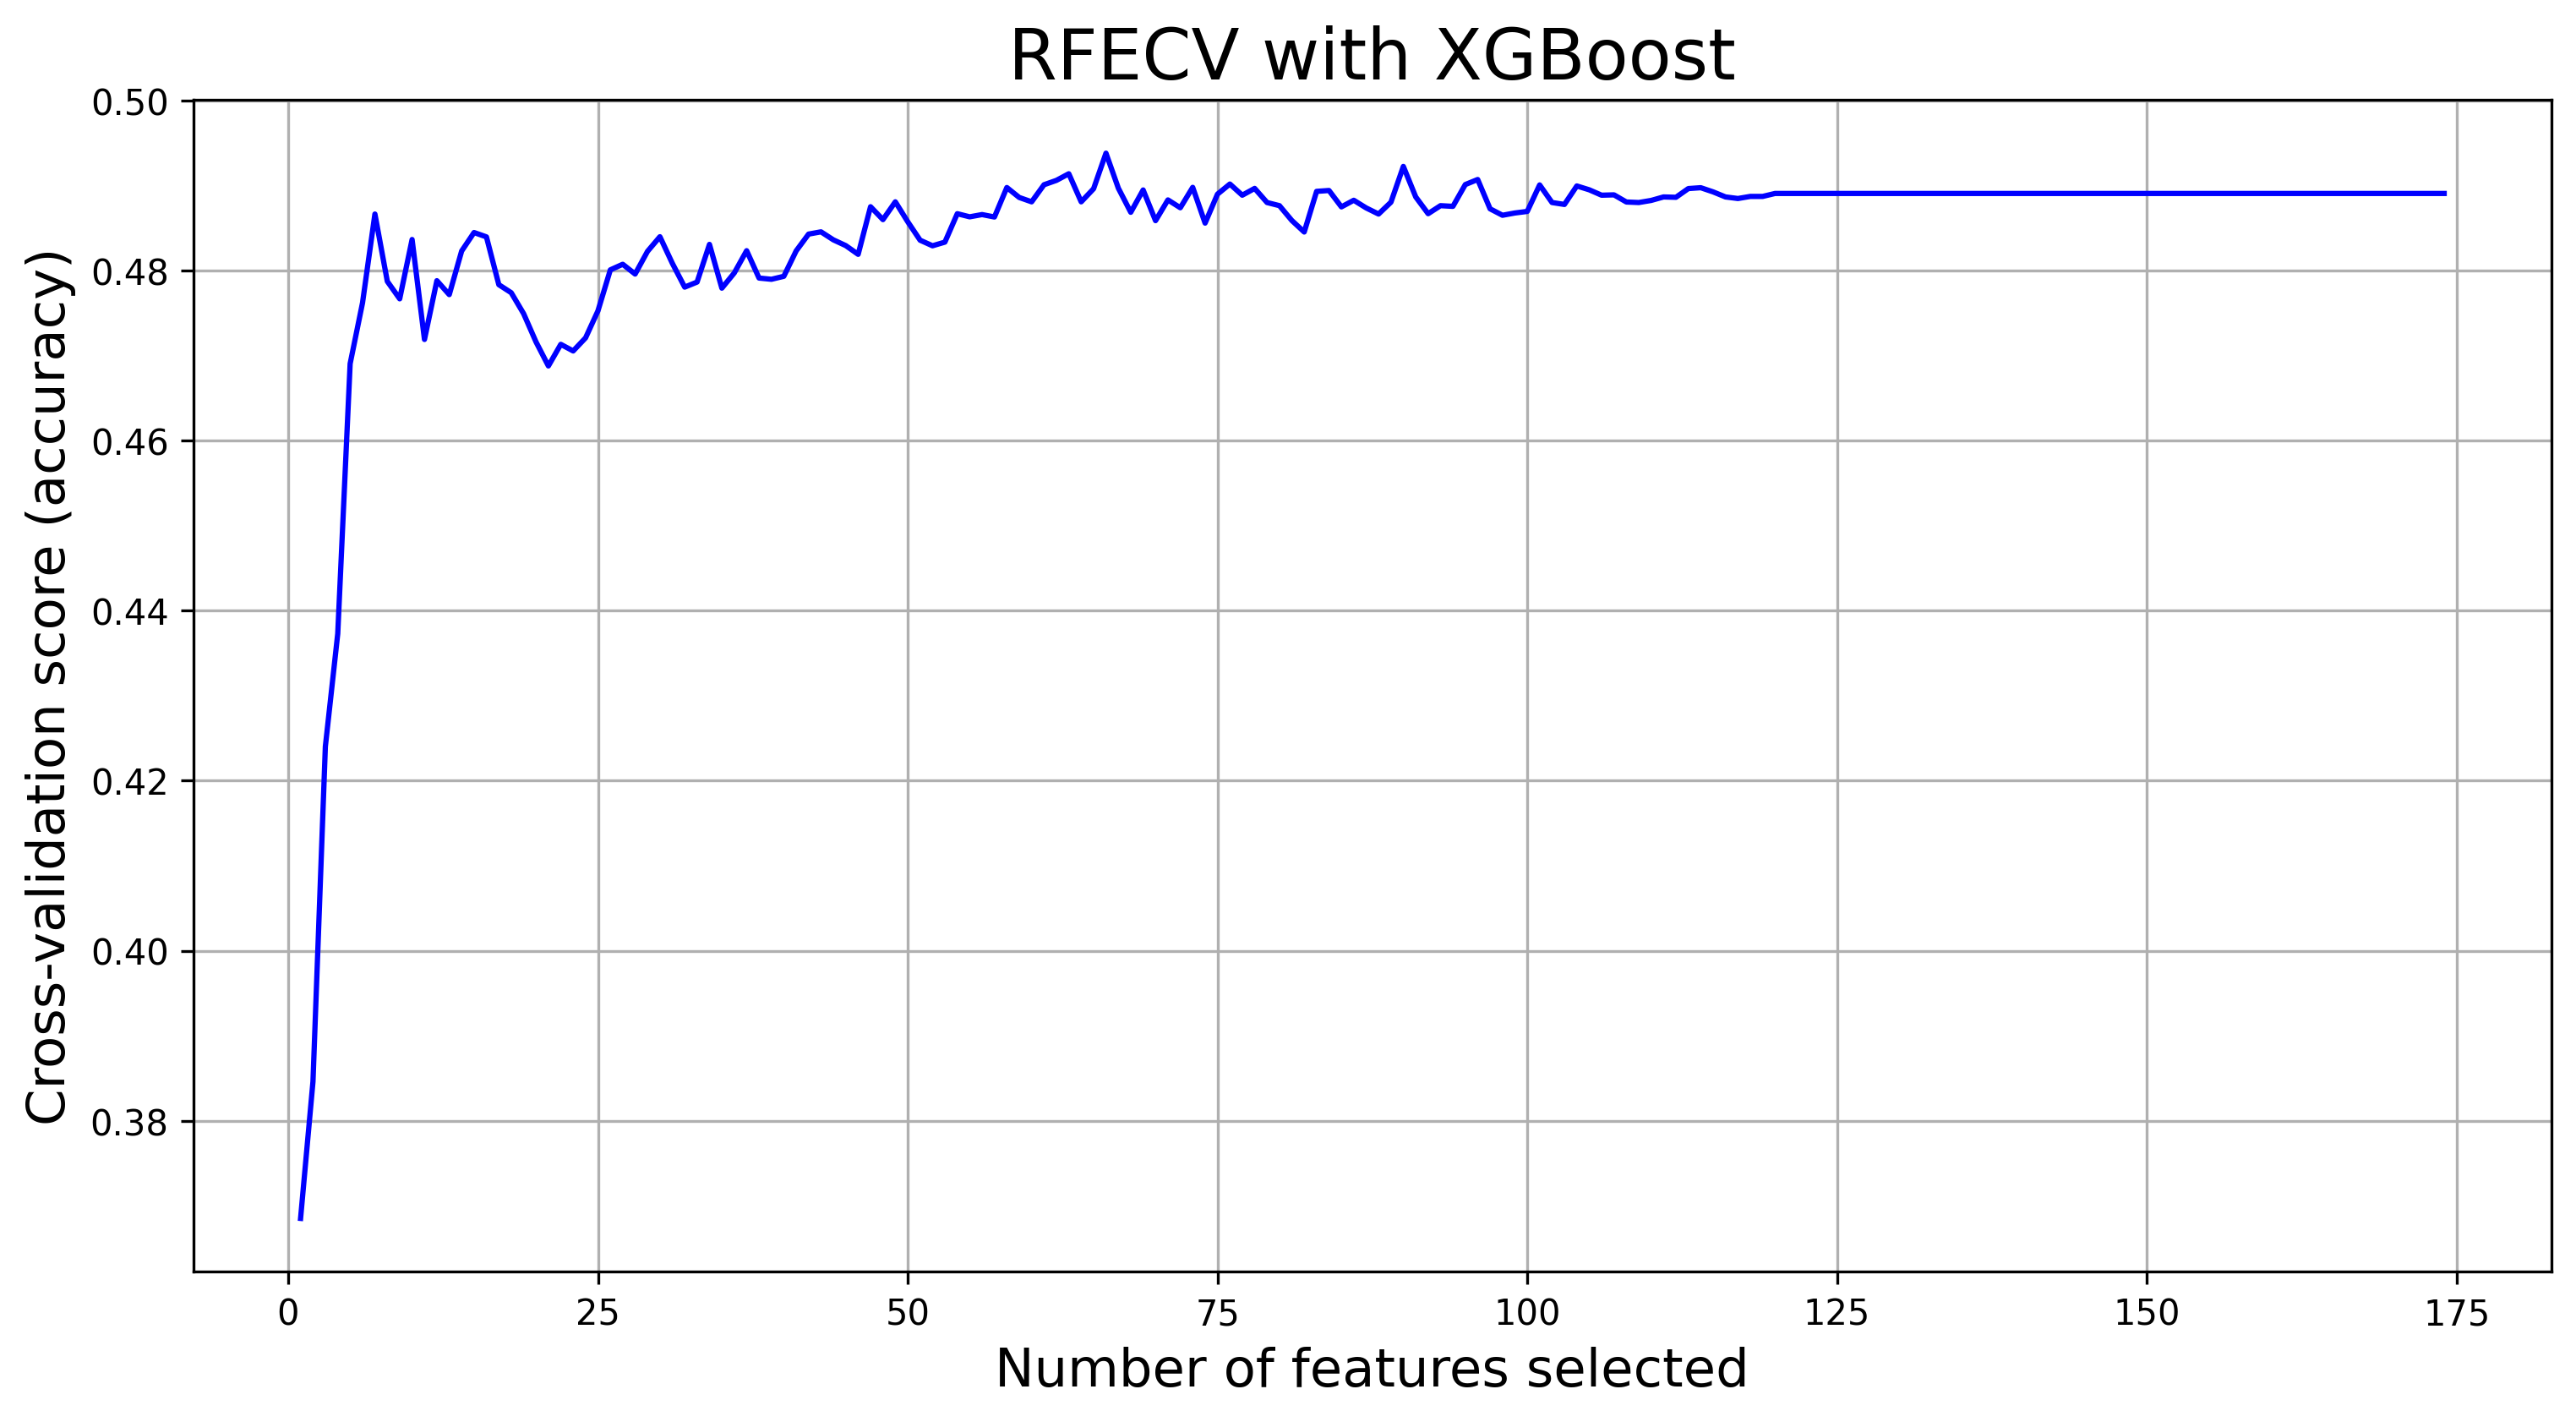

In [12]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(12, 6), dpi=300)
plt.xlabel("Number of features selected", size=15)
plt.ylabel("Cross-validation score (accuracy)", size=15)

# Use mean test score from cross-validation results
mean_test_score = np.mean(rfecv.cv_results_['mean_test_score'])
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], color='blue')
plt.grid(True)
plt.title('RFECV with XGBoost', size=20)
output_path = '/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/figures/RFECV_XGBoost.png'
plt.savefig(output_path)
plt.show()

Optimal number of features: 66
Selected features: Index(['filtered X (m/s^2).1', 'filtered Velocity (m/s)',
       'X (m/s^2)_rolling_mean', 'X (m/s^2)_rolling_std',
       'Y (m/s^2)_rolling_mean', 'Y (m/s^2)_rolling_std',
       'Z (m/s^2)_rolling_mean', 'X (m/s^2).1_rolling_mean',
       'X (m/s^2).1_rolling_std', 'Y (m/s^2).1_rolling_mean',
       'Y (m/s^2).1_rolling_std', 'Z (m/s^2).1_rolling_mean',
       'Z (m/s^2).1_rolling_std', 'X (rad/s)_rolling_mean',
       'X (rad/s)_rolling_std', 'Y (rad/s)_rolling_mean',
       'Z (rad/s)_rolling_mean', 'Z (rad/s)_rolling_std',
       'filtered X (m/s^2)_rolling_mean', 'filtered X (m/s^2)_rolling_std',
       'filtered Y (m/s^2)_rolling_mean', 'filtered Y (m/s^2)_rolling_std',
       'filtered Z (m/s^2)_rolling_mean', 'filtered X (m/s^2).1_rolling_mean',
       'filtered X (m/s^2).1_rolling_std', 'filtered Y (m/s^2).1_rolling_mean',
       'filtered Y (m/s^2).1_rolling_std', 'filtered Z (m/s^2).1_rolling_mean',
       'filtered Z (m/s^2).1_rolling_std', 'filtered X (rad/s)_rolling_std',
       'filtered Y (rad/s)_rolling_mean', 'filtered Y (rad/s)_rolling_std',
       'filtered Z (rad/s)_rolling_mean', 'filtered Z (rad/s)_rolling_std',
       'filtered Velocity (m/s)_rolling_mean',
       'filtered Velocity (m/s)_rolling_std',
       'Absolute Acceleration_rolling_mean',
       'Absolute Acceleration_rolling_std',
       'Absolute linear Acceleration_rolling_mean',
       'Absolute linear Acceleration_rolling_std',
       'Absolute Radius_rolling_mean', 'Absolute Radius_rolling_std',
       'X (m/s^2)_power_spectral_entropy', 'Y (m/s^2)_weighted_avg_freq',
       'Y (m/s^2)_power_spectral_entropy', 'Z (m/s^2)_power_spectral_entropy',
       'X (m/s^2).1_highest_freq', 'X (m/s^2).1_power_spectral_entropy',
       'Y (m/s^2).1_weighted_avg_freq', 'Y (m/s^2).1_power_spectral_entropy',
       'Z (m/s^2).1_highest_freq', 'X (rad/s)_highest_freq',
       'Z (rad/s)_highest_freq', 'Z (rad/s)_power_spectral_entropy',
       'filtered X (m/s^2)_power_spectral_entropy',
       'filtered Y (m/s^2)_power_spectral_entropy',
       'filtered Z (m/s^2)_power_spectral_entropy',
       'filtered Z (m/s^2).1_highest_freq', 'filtered Y (rad/s)_highest_freq',
       'filtered Z (rad/s)_highest_freq',
       'filtered Z (rad/s)_power_spectral_entropy',
       'filtered Velocity (m/s)_weighted_avg_freq',
       'filtered Velocity (m/s)_power_spectral_entropy',
       'Absolute Acceleration_power_spectral_entropy',
       'Absolute linear Acceleration_power_spectral_entropy',
       'Absolute Radius_power_spectral_entropy'],
      dtype='object')

In [15]:
y_test= test_set['Type']

In [18]:
# Evaluate the model on the test set with selected features
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)

model.fit(X_train_selected, y_train_encoded)
y_pred = model.predict(X_test_selected)

accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(f"Test Accuracy with selected features: {accuracy:.4f}")

Test Accuracy with selected features: 0.4233


In [ ]:
y_train_encoded 
y_test

In [101]:
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix: {conf_matrix}')
print(f"Test Accuracy with selected features: {accuracy:.4f}")

ValueError: Found input variables with inconsistent numbers of samples: [12409, 13006]

In [102]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Initialize the label encoder and fit it on the training set types
label_encoder = LabelEncoder()
label_encoder.fit(train_set['Type'])

# Get the class names from the label encoder
class_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))

# Extract the diagonal elements which represent the correctly predicted instances
correct_predictions = np.diagonal(conf_matrix)

# Create a dictionary to map class names to their correct predictions count
correct_predictions_dict = dict(zip(class_names, correct_predictions))

# Print out the correct predictions for each type
print("Correct predictions for each type:")
for class_name, count in correct_predictions_dict.items():
    print(f"{class_name}: {count}")

ValueError: Found input variables with inconsistent numbers of samples: [12409, 13006]